# Pipeline

1. Preprocessing
2. Data Extraction
3. **Data Exploration**
4. Model

This file explores the data at hand. This is done by visual means and relevant statistic figues.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_pickle('preprocessed_results.pkl')
df = pd.read_pickle('feature_frame.pkl')

In [4]:
results.head(1)

,Div,Date,HomeID,AwayID,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E1,2010-08-14,0,15,3,0,1,2,0,H,...,11,2,15,15,16,7,1,2,0,0


In [5]:
df.head(1)

,HomeID,AwayID,FTHG,FTAG,FTR,Date,H_WIN_PCT_home,H_DRAW_PCT_home,A_WIN_PCT_home,A_DRAW_PCT_home,...,REL_PTS_1_away,REL_PTS_2_away,REL_PTS_3_away,REL_PTS_4_away,REL_PTS_5_away,REL_PTS_N-0_away,REL_PTS_N-1_away,REL_PTS_N-2_away,REL_PTS_N-3_away,REL_PTS_N-4_away
0,0,15,3,0,1,2010-08-14,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
D1_games = results[results.Div == 'D1']
E1_games = results[results.Div == 'E1']
I1_games = results[results.Div == 'I1']
SP1_games = results[results.Div == 'SP1']

In [4]:
# Gets home win percentage, draw percentage, away percentage
def get_win_percentages(df):
    return sum(df['FTR'] == 1) / len(df), sum(df['FTR'] == 0) / len(df), sum(df['FTR'] == 2) / len(df)

# Win percentages

In [13]:
league_labels = ['Premier League', 'Bundesliga', 'Serie A', 'Primera División']
h_win_pcts = [get_win_percentages(E1_games)[0], get_win_percentages(D1_games)[0], get_win_percentages(I1_games)[0], get_win_percentages(SP1_games)[0]]
draw_pcts = [get_win_percentages(E1_games)[1], get_win_percentages(D1_games)[1], get_win_percentages(I1_games)[1], get_win_percentages(SP1_games)[1]]
a_win_pcts = [get_win_percentages(E1_games)[2], get_win_percentages(D1_games)[2], get_win_percentages(I1_games)[2], get_win_percentages(SP1_games)[2]]

x = np.arange(len(league_labels))
width = 0.35

In [64]:
results.groupby('Div')['FTR'].value_counts(normalize=True)

Div  FTR
D1   1      0.458243
     2      0.299564
     0      0.242193
E1   1      0.457602
     2      0.295614
     0      0.246784
I1   1      0.453774
     2      0.288765
     0      0.257461
SP1  1      0.478070
     2      0.284795
     0      0.237135
Name: FTR, dtype: float64

Ausgerechnete Gesamtaverages (über alle Ligen):
Home win percentage: 0.46192225
Away win percentage: 0.2921845
Draw percentage: 0.24589325

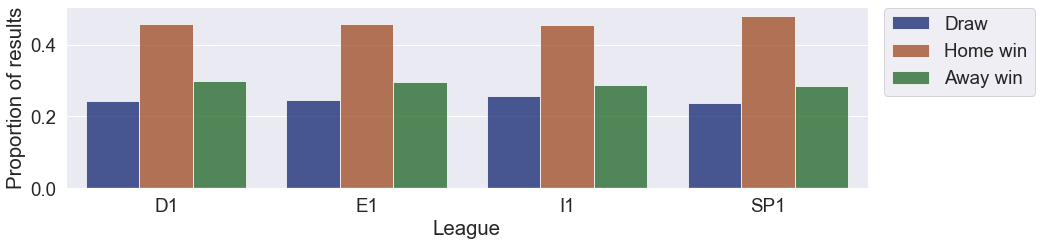

In [3]:
#plt.figure(figsize=(16, 6))
sns.set_theme()
sns.set(font_scale=1.7)
x, y = 'Div', 'FTR'
fig = (results.groupby(x)[y]
 .value_counts(normalize=True)
 .rename('Proportion of results')
 .reset_index()
 .pipe((sns.catplot, 'data'), x=x, y='Proportion of results', hue=y, kind='bar', alpha=.75, palette='dark', height=3.5, aspect=3.5, legend_out=False))

L = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
L.get_texts()[0].set_text('Draw')
L.get_texts()[1].set_text('Home win')
L.get_texts()[2].set_text('Away win')

fig.despine(right=False)
plt.xlabel("League")
plt.savefig("graphic_files/league_results.pdf", format='pdf', dpi=500, bbox_inches='tight')

In [8]:
get_win_percentages(I1_games)

(0.4537741369221767, 0.2574605032182563, 0.288765359859567)

In [23]:
sum(D1_games['FTR'] == 1)

1262